In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('./csv/data/nowae_fixed_train_data.csv')
df = df.drop(['screen_height', 'screen_width'], axis=1)

In [40]:
df.head()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
0,699.917969,273.209656,597.206299,269.348969,50.0,50
1,699.356445,272.334381,596.710999,269.084320,50.0,50
2,699.588257,272.633484,596.785278,269.304718,50.0,50
3,700.239685,272.790924,597.225525,269.525726,50.0,50
4,699.577087,272.637482,596.814453,269.068573,50.0,50


In [41]:
df.describe()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,692.123806,273.617313,589.917599,271.494760,747.500000,373.000000
std,3.562315,1.619885,3.667332,1.991562,624.487766,289.189317
min,684.797485,270.115448,583.194336,267.820679,50.000000,50.000000
25%,688.773865,272.128471,586.239670,269.425392,50.000000,50.000000
50%,692.307983,273.840881,590.279053,272.127853,747.500000,373.000000
75%,694.443420,274.844398,593.037582,273.060188,1445.000000,696.000000
max,700.338501,282.286926,597.520874,278.683777,1445.000000,696.000000


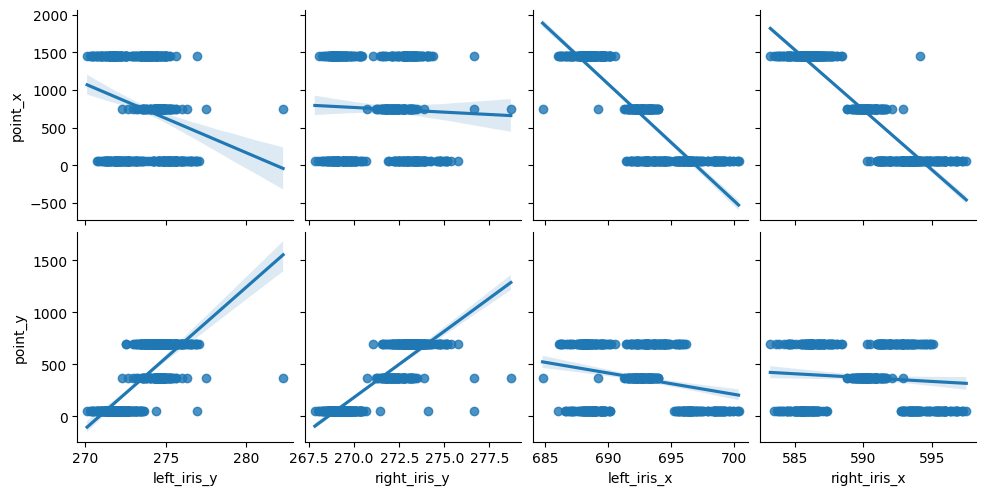

In [42]:
sns.pairplot(df, x_vars=['left_iris_y', 'right_iris_y', 'left_iris_x',
             'right_iris_x'], y_vars=['point_x', 'point_y'], kind='reg')
plt.show()

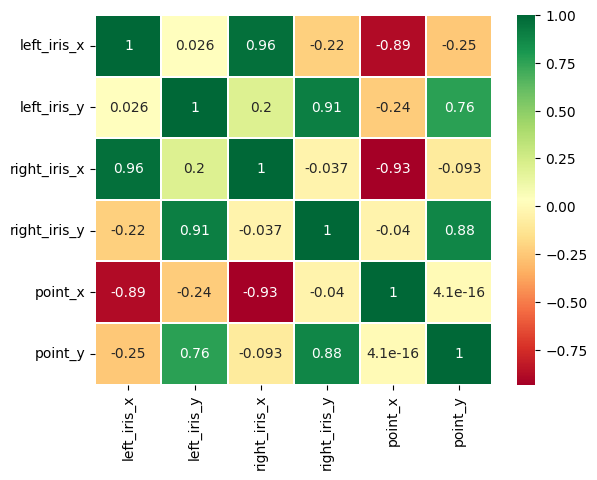

In [43]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

In [44]:
X_x = df[['left_iris_x', 'right_iris_x']]
y_x = df['point_x']

In [45]:
X_x.head()

,left_iris_x,right_iris_x
0,699.917969,597.206299
1,699.356445,596.710999
2,699.588257,596.785278
3,700.239685,597.225525
4,699.577087,596.814453


In [46]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_x, y_x, test_size=0.2)

In [47]:
model_x = linear_model.LinearRegression()
model_x.fit(X_train_x, y_train_x)
y_pred_x = model_x.predict(X_test_x)
r2_score(y_test_x, y_pred_x)

0.8846364582785938

In [48]:
y_pred_x

array([ 5.16256469e+02,  1.35506012e+03,  1.28965275e+03,  1.43851905e+03,
        2.14500679e+02,  1.50805607e+03,  1.34566883e+03,  4.45490254e+02,
       -1.12710669e+00,  7.72725768e+02,  1.67030467e+03,  1.31970316e+03,
        1.08303881e+03,  1.60333959e+03,  4.30221686e+02,  7.44416716e+02,
        5.38028569e+02,  1.36130905e+03,  7.45998100e+02,  1.31670882e+03,
        2.80860932e+02,  1.46181182e+03, -1.49205519e+02,  1.82619444e+02,
        1.43086192e+03,  1.13205138e+02,  2.03854561e+02,  1.22758484e+03,
        5.28664138e+02,  1.40746275e+03,  1.34853960e+03,  1.24970858e+03,
        2.01845195e+02,  2.20833102e+02,  4.55533978e+02,  1.27723379e+03,
        1.74881110e+03, -4.93059550e+01,  1.56553705e+03,  1.35953548e+03,
        2.23769145e+02,  7.26487690e+02,  1.27855469e+03,  1.57142591e+03,
        7.62649304e+02,  1.83990324e+02,  1.31028150e+03,  3.53696021e+02,
        4.35266051e+02,  1.45866195e+03,  6.93144226e+02, -2.71271222e+02,
       -1.06596602e+02,  

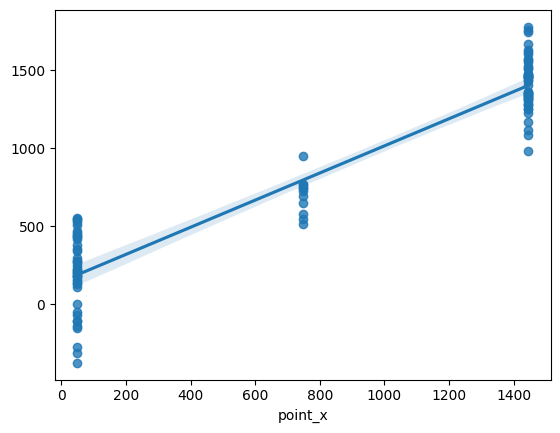

In [49]:
sns.regplot(x=y_test_x, y=y_pred_x)
plt.show()

In [50]:
X_y = df[['left_iris_y', 'right_iris_y']]
y_y = df['point_y']

In [51]:
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X_y, y_y, test_size=0.2, random_state=42)

In [52]:
model = linear_model.LinearRegression()
model.fit(X_train_y, y_train_y)
y_pred_y = model.predict(X_test_y)
r2_score(y_test_y, y_pred_y)

0.8282024741846941

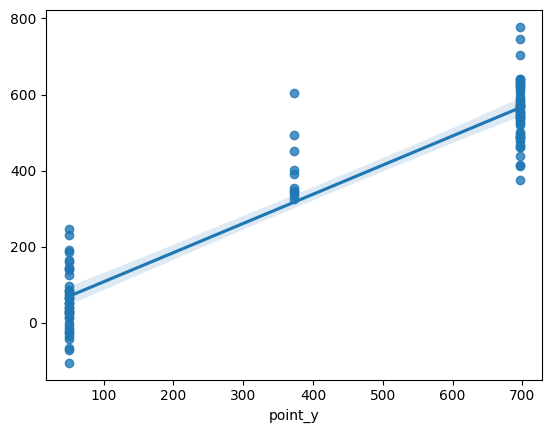

In [53]:
sns.regplot(x=y_test_y, y=y_pred_y)
plt.show()

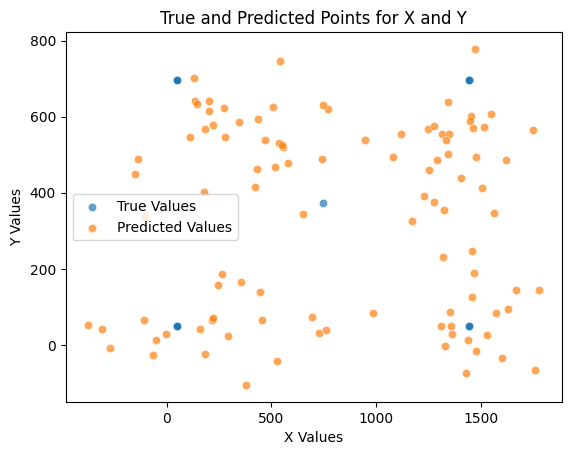

In [54]:
data = {'True X': y_test_x, 'Predicted X': y_pred_x,
        'True Y': y_test_y, 'Predicted Y': y_pred_y}

sns.scatterplot(x='True X', y='True Y', data=data,
                label='True Values', alpha=0.7)
sns.scatterplot(x='Predicted X', y='Predicted Y', data=data,
                label='Predicted Values', alpha=0.7)

plt.title('True and Predicted Points for X and Y')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

plt.show()

In [55]:
data = np.array([y_pred_x, y_pred_y]).T

In [56]:
data.shape

(100, 2)

In [57]:
model = KMeans(n_clusters=5, n_init='auto', init='k-means++', random_state=42)
y_kmeans = model.fit_predict(data)

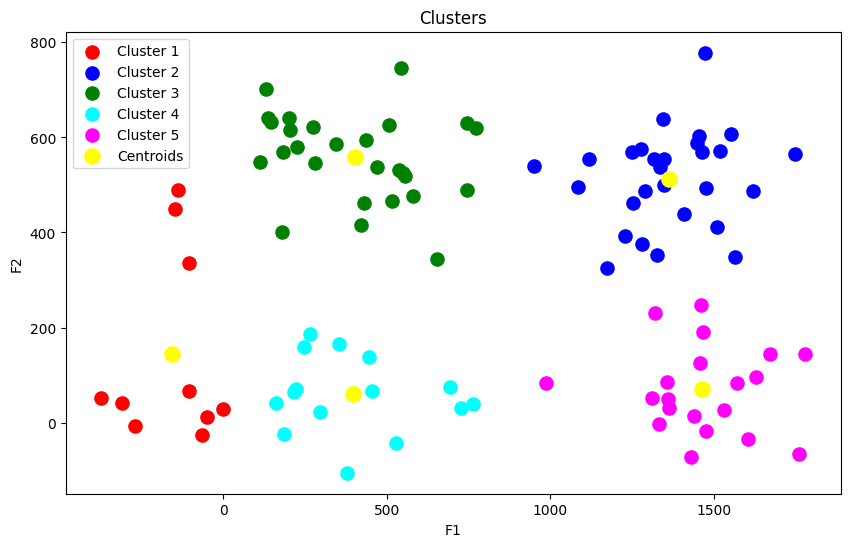

In [58]:
plt.figure(figsize=(10, 6))

plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1],
            s=90, c='red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1],
            s=90, c='blue', label='Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1],
            s=90, c='green', label='Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1],
            s=90, c='cyan', label='Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1],
            s=90, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
            :, 1], s=120, c='yellow', label='Centroids')

plt.title('Clusters')

plt.xlabel('F1')
plt.ylabel('F2')

plt.legend()
plt.show()